# CIC-IDS-2017

Prepare CIC-IDS-2017 dataset for model training

Steps:
1. Load data.
2. Exploratory Data Analysis (EDA).
3. Data preparation.<br>
   3.1. Principal Component Analysis (PCA).<br>
   3.2. Data normalization.
4. Train models for classification.
5. Train models for anomaly detection.

# 1. Prerequisites

In [2]:
def visualize_CM(matrix):
    """
    Visualize Correlation Matrix
    """
    sns.heatmap(matrix,annot=True)

def plotResults(df, columns_list, rows, columns):
    """
    Plot results
    """
    fig, axes = plt.subplots(rows, columns)
    for ax, col in zip(axes.ravel(), columns_list):
        df[col].plot(ax=ax,
                     kind="bar",
                     figsize=(15,50),
                     fontsize=12)
        if col in ["Accuracy", "Precision", "F1", "Recall"]:
            ax.set_title(f"{col} (Higher is better)", fontsize=20)
        else:
            ax.set_title(f"{col} (Lower is better)", fontsize=20)
        ax.tick_params(axis='x', labelrotation=0)

# 1. Loading data

In [1]:
import os
import pandas as pd

In [3]:
for dirname, _, filenames in os.walk('../../datasets/CIC_IDS_2017/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../datasets/CIC_IDS_2017/README.md
../../datasets/CIC_IDS_2017/download_dataset
../../datasets/CIC_IDS_2017/TrafficLabelling/TrafficLabelling.7z
../../datasets/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
../../datasets/CIC_IDS_2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv


In [4]:
monday = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv', sep=",", encoding='utf-8')
tuesday = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv', sep=",", encoding='utf-8')
wednesday = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv', sep=",", encoding='utf-8')
thursday_morning = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', sep=",", encoding='utf-8')
thursday_afternoon = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', sep=",", encoding='utf-8')
friday_ddos = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', sep=",", encoding='utf-8')
friday_pcap = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', sep=",", encoding='utf-8')
friday_morning = pd.read_csv('../../datasets/CIC_IDS_2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv', sep=",", encoding='utf-8')
monday.name = 'Monday'
tuesday.name = 'Tuesday'
wednesday.name = 'Wednesday'
thursday_morning.name = 'Thursday_Morning'
thursday_afternoon.name = 'Thursday_Afternoon'
friday_ddos.name = 'Friday_DDoS'
friday_pcap.name = 'Friday_Pcap'
friday_morning.name = 'Friday_Morning'

In [5]:
dataframes = [monday, tuesday, wednesday, thursday_morning, thursday_afternoon, friday_ddos, friday_morning, friday_pcap]
data = pd.concat(dataframes)

# 2. Exploratory Data Analysis (EDA)

## 2.1. General info

In [6]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Strip prepended space from some of the column names

In [8]:
data.columns = [col.lstrip() for col in data.columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [10]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'DDoS', 'Bot',
       'PortScan'], dtype=object)

In [11]:
data['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Processing missing values

## 2.2. Missing values

In [12]:
import numpy as np

from prettytable import PrettyTable

In [13]:
def missing_values(df):
    """
    Print a table with missing values
    """
    table = PrettyTable(["Column", "All Values", "Missing Values", "% of missing values"])
    NaN_columns = []
    columns = df.columns
    for column in columns:
        all_values = df[column].count()
        missing_values = df[column].isna().sum()
        if missing_values > 0:
            NaN_columns.append(column)
        percentage = f'{(missing_values / all_values)*100:.2f}'
        table.add_row([column, all_values, missing_values, f'{percentage}%'])
    data = table.get_string()
    #with open(f"Missing_table.txt", 'w') as f:
    #    f.write(data)
    print(table)
    if len(NaN_columns) > 0:
        print(f"Columns with missing values: {NaN_columns}")
    #print(f"Table saved as Missing_table.txt")

In [14]:
data = data.replace([-np.inf, np.inf], np.nan)
missing_values(data)

+-----------------------------+------------+----------------+---------------------+
|            Column           | All Values | Missing Values | % of missing values |
+-----------------------------+------------+----------------+---------------------+
|       Destination Port      |  2830743   |       0        |        0.00%        |
|        Flow Duration        |  2830743   |       0        |        0.00%        |
|      Total Fwd Packets      |  2830743   |       0        |        0.00%        |
|    Total Backward Packets   |  2830743   |       0        |        0.00%        |
| Total Length of Fwd Packets |  2830743   |       0        |        0.00%        |
| Total Length of Bwd Packets |  2830743   |       0        |        0.00%        |
|    Fwd Packet Length Max    |  2830743   |       0        |        0.00%        |
|    Fwd Packet Length Min    |  2830743   |       0        |        0.00%        |
|    Fwd Packet Length Mean   |  2830743   |       0        |        0.00%  

Drop columns with missing values

In [15]:
data.dropna(inplace=True)
missing_values(data)

+-----------------------------+------------+----------------+---------------------+
|            Column           | All Values | Missing Values | % of missing values |
+-----------------------------+------------+----------------+---------------------+
|       Destination Port      |  2827876   |       0        |        0.00%        |
|        Flow Duration        |  2827876   |       0        |        0.00%        |
|      Total Fwd Packets      |  2827876   |       0        |        0.00%        |
|    Total Backward Packets   |  2827876   |       0        |        0.00%        |
| Total Length of Fwd Packets |  2827876   |       0        |        0.00%        |
| Total Length of Bwd Packets |  2827876   |       0        |        0.00%        |
|    Fwd Packet Length Max    |  2827876   |       0        |        0.00%        |
|    Fwd Packet Length Min    |  2827876   |       0        |        0.00%        |
|    Fwd Packet Length Mean   |  2827876   |       0        |        0.00%  

In [16]:
data['Label'].value_counts()

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

## 2.3. Class distribution

Distribution of flow record classes available in CIC-IDS-2017 dataset

In [16]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'DDoS', 'Bot',
       'PortScan'], dtype=object)

In [17]:
len(data['Label'].unique())

15

In [17]:
import matplotlib.pyplot as plt

In [18]:
label = [
    'Benign',
    'Hulk',
    'Portscan',
    'DDoS',
    'Goldeneye',
    'FTP-Patator',
    'SSH-Patator',
    'Slowloris',
    'Slowhttptest',
    'Bot',
    'BruteForce',
    'XSS',
    'Infiltration',
    'SQLi',
    'Heartbleed'
]

In [19]:
count = data['Label'].value_counts()

In [20]:
label

['Benign',
 'Hulk',
 'Portscan',
 'DDoS',
 'Goldeneye',
 'FTP-Patator',
 'SSH-Patator',
 'Slowloris',
 'Slowhttptest',
 'Bot',
 'BruteForce',
 'XSS',
 'Infiltration',
 'SQLi',
 'Heartbleed']

In [21]:
count

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [22]:
def binary_plot(label, count):
    """Benign vs Attack traffic distribution in CIC-IDS-2017 dataset"""
    benign_count = count.iloc[0]
    attack_count = sum(count.iloc[x] for x in range(1, len(label)))
    
    _dict = {}
    _dict[label[0]] = benign_count
    _dict['Malicious'] = attack_count
    
    total_count = benign_count + attack_count
    bar_labels = [f"{benign_count / total_count * 100:.2f}%", f"{attack_count / total_count * 100:.2f}%"]

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(which='Major', axis='both', zorder=0)
    ax.bar(_dict.keys(), _dict.values(), zorder=3)
    for container in ax.containers:
        ax.bar_label(container, labels=bar_labels)
    ax.set_title('Traffic distribution', fontsize=16, fontweight="bold")
    ax.set_xlabel('Traffic type')
    ax.set_ylabel('Distribution')
    #plt.savefig("Traffic_type_distribution.png")

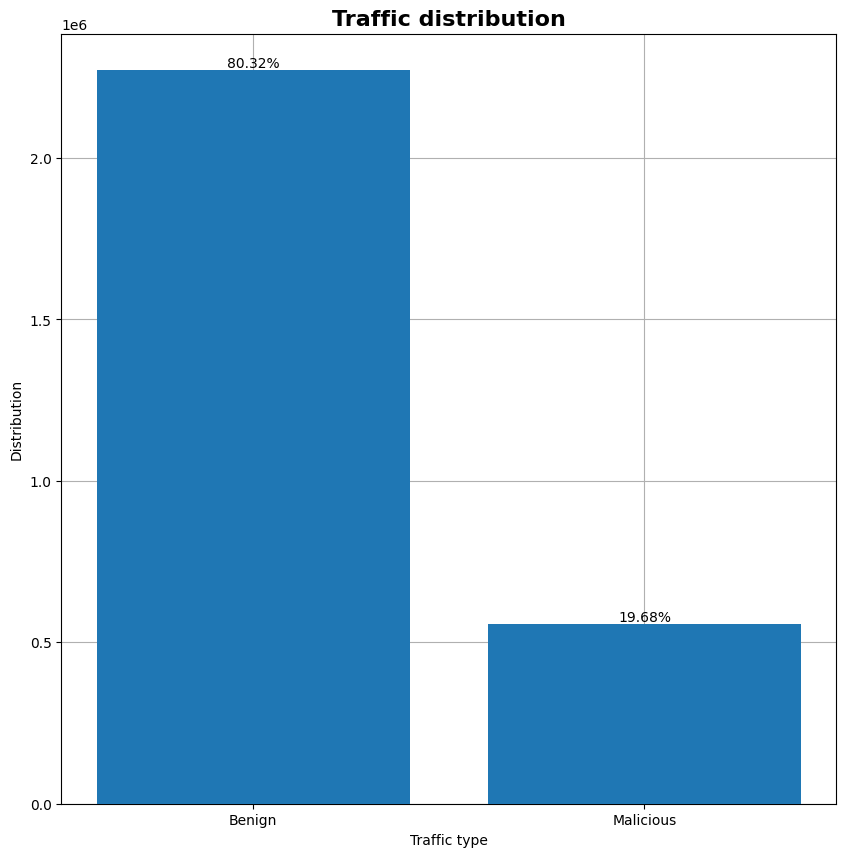

In [23]:
binary_plot(label, count)

In [24]:
attack_count = 0
for x in range(1,len(count)):
    attack_count += count.iloc[x]

In [25]:
binary_label = ['Benign', 'Malicious']
binary_count = [count.iloc[0], attack_count]

In [26]:
def binary_pie_plot(label, count):
    """Pie plot to show benign vs malicious flow record distribution"""
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.tight_layout()
    plt.title(label="Binary traffic distribution")
    ax.pie(count, labels=label, autopct='%1.0f%%',
           wedgeprops = {"edgecolor": "black",
                         "linewidth": 1,
                         "antialiased": True})
    ax.legend()

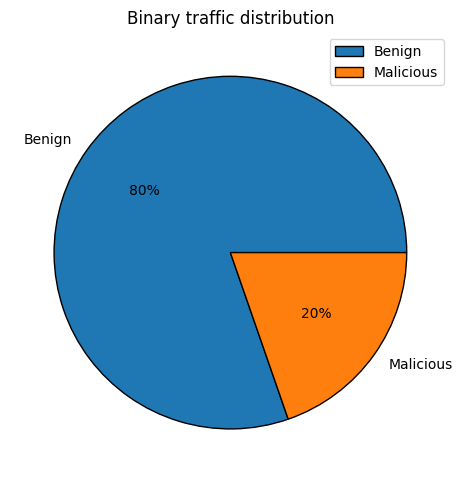

In [27]:
binary_pie_plot(binary_label, binary_count)

In [28]:
def attack_plot(label, count):
    """Plot distribution statistics of different attacks available in the dataset"""
    label = [x for x in label if x != 'Benign']
    count = [count.iloc[x] for x in range(1,len(count))]
    _dict = {label[x]: count[x] for x in range(len(label))}

    total_count = sum(count[x] for x in range(len(count)))
    bar_labels = [f"{count[x] / total_count * 100:.2f}%" for x in range(len(count))]
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(which='Major', axis='both', zorder=0)
    ax.bar(_dict.keys(), _dict.values(), zorder=3)
    for container in ax.containers:
        ax.bar_label(container, labels=bar_labels)
    ax.set_title('Attack type distribution', fontsize=16, fontweight="bold")
    ax.set_xlabel('Traffic type')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_ylabel('Distribution')

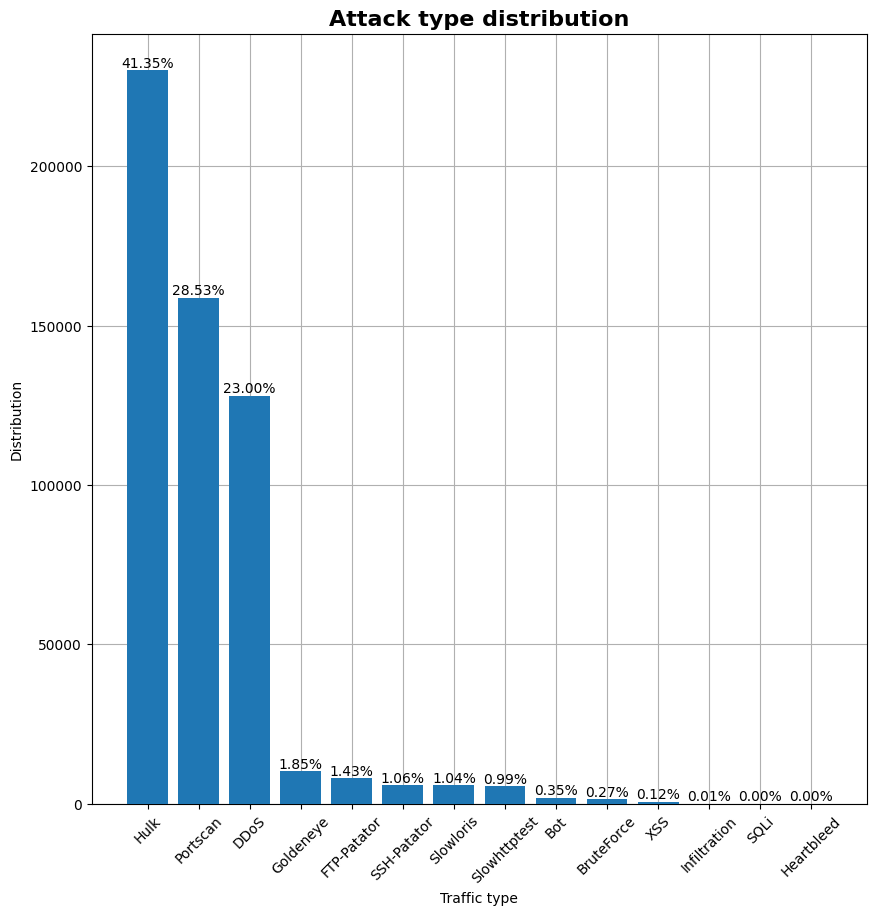

In [29]:
attack_plot(label, count)

## 2.4. Removing duplicate records

Fwd Header Length.1 is a duplicate of Fwd Header Length and is dropped from the dataframe

In [30]:
if len(np.where(data['Fwd Header Length'] != data['Fwd Header Length.1'])[0]) == 0:
    data.drop(['Fwd Header Length.1'], axis=1, inplace=True)

In [31]:
len(data.columns)

78

In [32]:
%%time
    
data[data.duplicated() == True]

CPU times: user 9.52 s, sys: 466 ms, total: 9.98 s
Wall time: 10.2 s


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2,49188,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,49486,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,49486,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
46,389,1,2,0,7,0,7,0,3.5,4.949747,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286402,53,223,2,2,76,300,38,38,38.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286403,53,241,2,2,76,300,38,38,38.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286441,53,161,2,2,58,90,29,29,29.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286450,53,202,2,2,90,206,45,45,45.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [33]:
print(f"All rows: {len(data)}; Duplicated rows: {len(data[data.duplicated() == True])}; Percentage of duplicates: {len(data[data.duplicated() == True]) / len(data) * 100:.2f}%")

All rows: 2827876; Duplicated rows: 307078; Percentage of duplicates: 10.86%


307078 duplicated values found, which is 10.86% of all flow records available in the dataset. Decision - drop duplicate rows

In [34]:
%%time

data = data.drop_duplicates()

CPU times: user 10.6 s, sys: 567 ms, total: 11.1 s
Wall time: 11.3 s


In [35]:
print(f"Rows left: {len(data)}")

Rows left: 2520798


## 2.5. Variance

Check feature variance to select most descriptive features

### 2.5.1. Zero variance

Check columns with zero variance

In [37]:
%%time

variance_per_column = data.select_dtypes(exclude='object').var().items()

zero_variance_features = []

for column_name, variance in variance_per_column:
    if variance == 0:
        zero_variance_features.append(column_name)

zero_variance_features

CPU times: user 847 ms, sys: 246 ms, total: 1.09 s
Wall time: 1.1 s


['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [38]:
len(zero_variance_features)

8

There are 8 features in CIC-IDS-2017 dataset with 0 variance, meaning it does not provide any descriptory value.
The decision is to drop these features from the dataset

In [39]:
data.drop(zero_variance_features, axis=1, inplace=True)

In [40]:
len(data.columns)

70

## 2.5.2 Univariate analysis

In [41]:
def plot_boxplot(df):
    selected_features = ['Flow Duration',
                        'Total Fwd Packets',
                        'Total Backward Packets',
                        'Total Length of Fwd Packets',
                        'Total Length of Bwd Packets',
                        'Fwd IAT Total',
                        'Bwd IAT Total',
                        'Fwd Header Length',
                        'Bwd Header Length']
    n_cols = 3
    n_rows = int(np.ceil(len(selected_features) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten()

    for idx, feature in enumerate(selected_features):
        data = df[feature]
        axes[idx].boxplot(data, patch_artist=True)
        axes[idx].set_title(feature, fontsize=16, fontweight='bold')
        axes[idx].set_ylabel('Values', fontsize=12)
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].tick_params(labelsize=8)

    for idx in range(len(selected_features), len(axes)):
        fig.delaxes(axes[idx])

    plt.suptitle('Univariate Boxplot Analysis - CIC-IDS-2017 Dataset', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

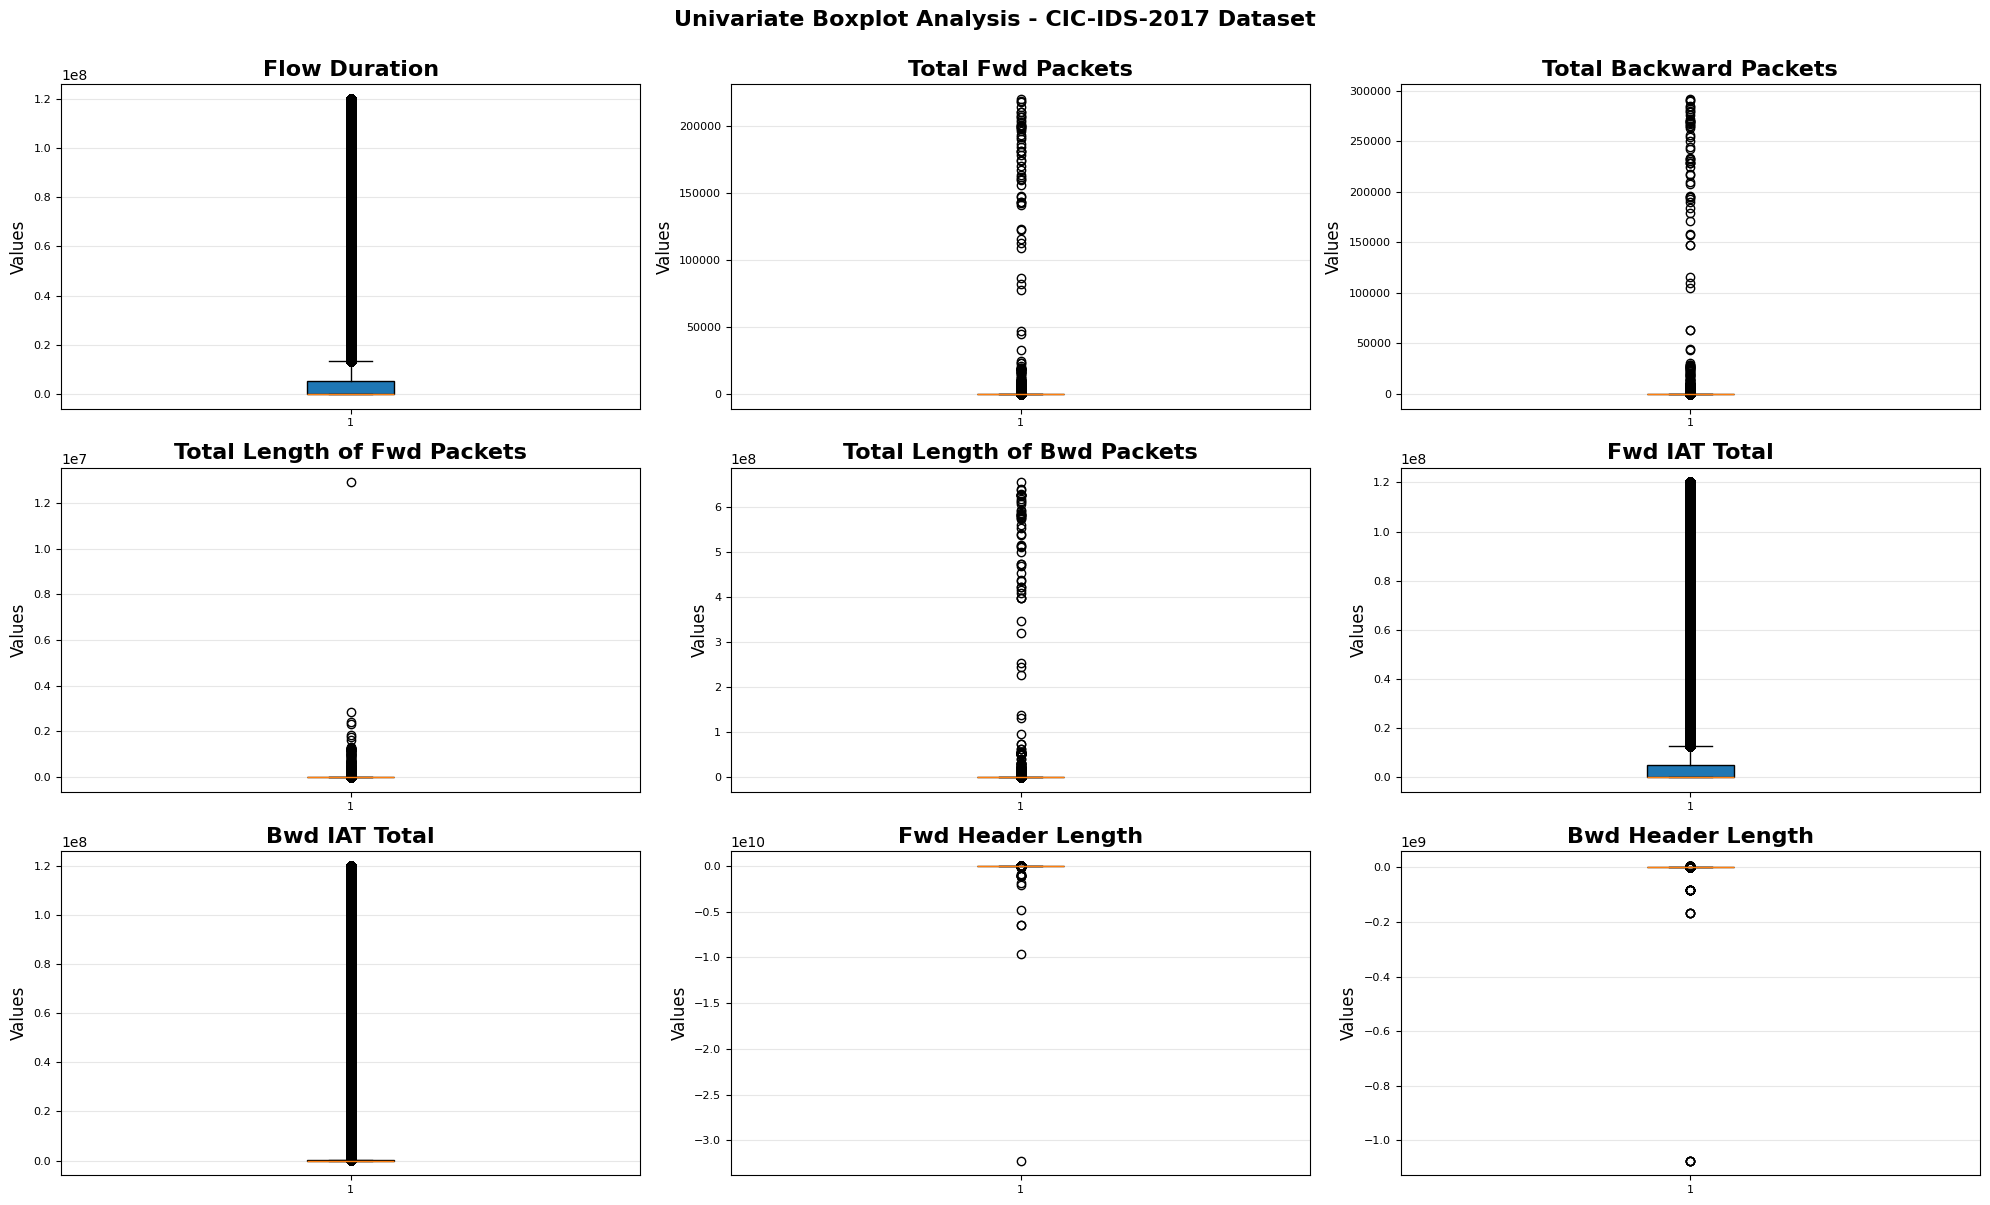

CPU times: user 4.92 s, sys: 30.7 ms, total: 4.95 s
Wall time: 4.97 s


In [42]:
%%time

plot_boxplot(data)

## 2.5.3 Bivariate analysis

In [44]:
import seaborn as sns

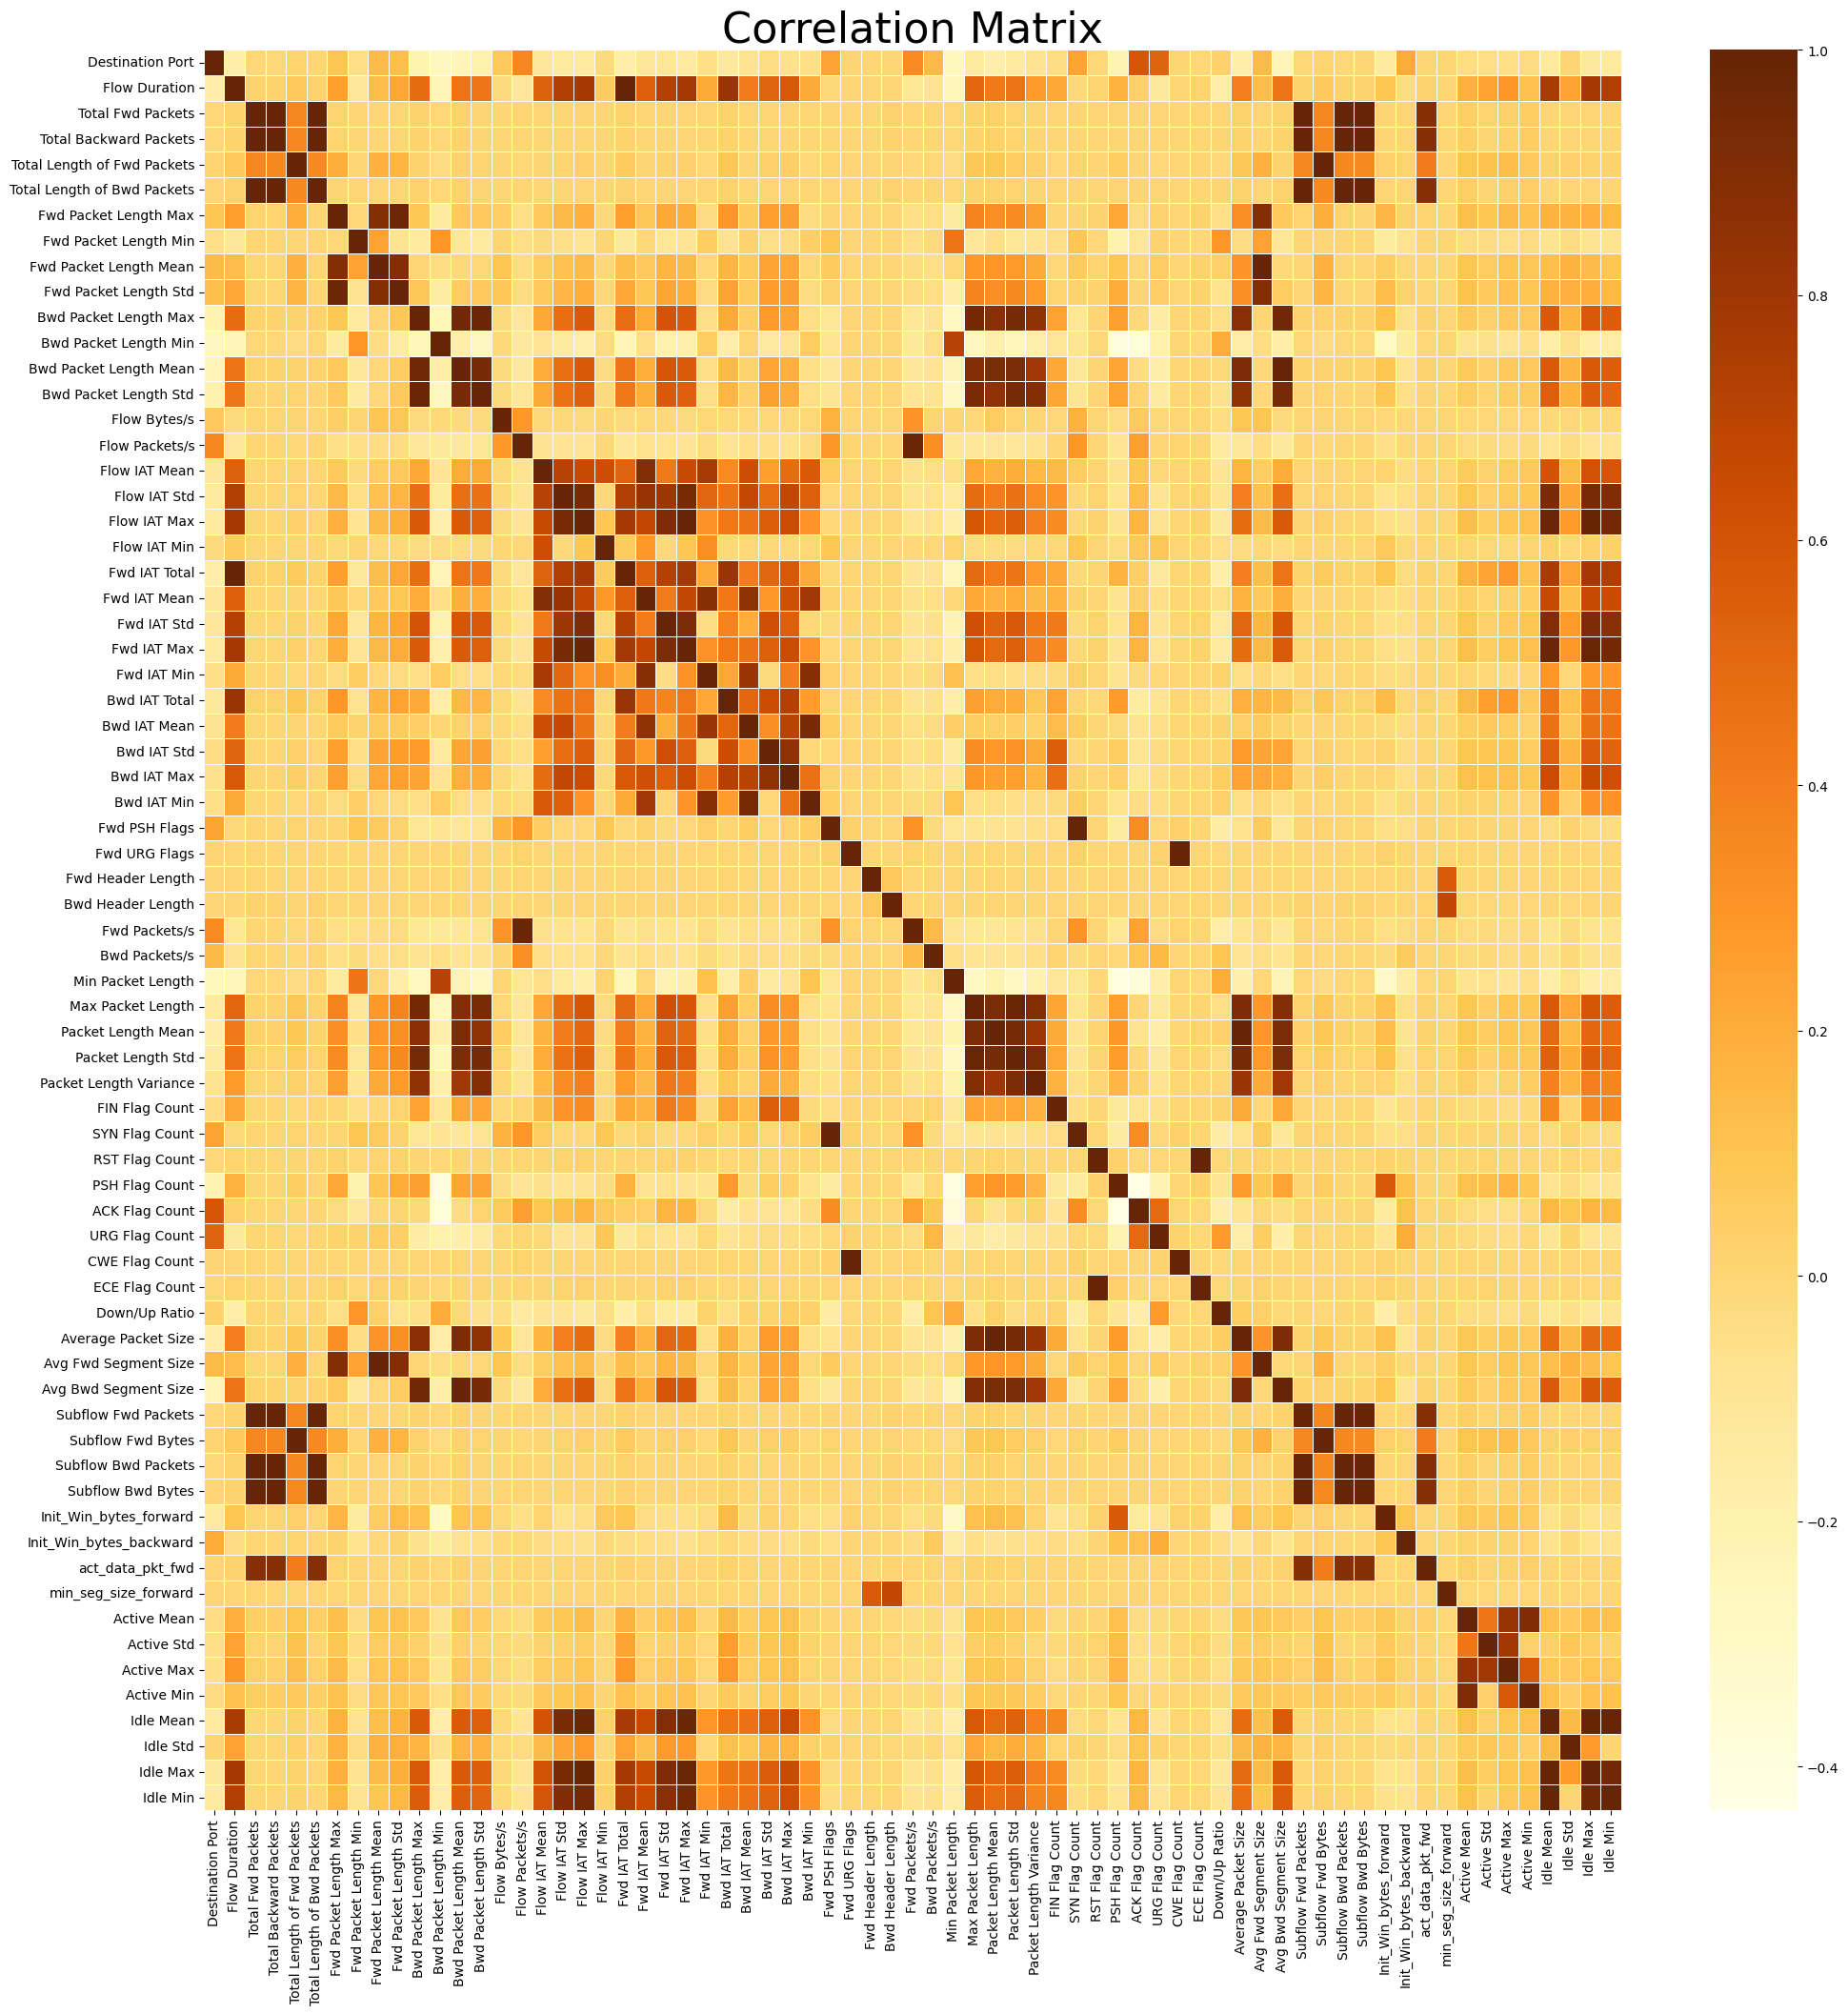

CPU times: user 30.1 s, sys: 139 ms, total: 30.2 s
Wall time: 30.5 s


In [45]:
%%time

correlation_matrix = data.corr(numeric_only = True)

fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(correlation_matrix, cmap = 'YlOrBr', linewidth = 0.7, annot = False)
plt.title('Correlation Matrix', fontsize = 32)
plt.show()

# Autoencoder training

In [37]:
data['Class'] = ['Benign' if x == 'BENIGN' else 'Malicious' for x in data['Label']]
data['Class'].unique()

array(['Benign', 'Malicious'], dtype=object)

In [38]:
benign_data = data[data['Label']=='BENIGN']
X = benign_data.drop(['Label', 'Class'], axis=1)
y = benign_data['Class']

In [41]:
X.drop(['Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'], axis=1, inplace=True)

In [42]:
X.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [43]:
len(X.columns)

55

In [44]:
y.unique()

array(['Benign'], dtype=object)

In [46]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
le = LabelEncoder()

y = le.fit_transform(y)

In [49]:
np.unique(y)

array([0])

# 

# 3. Prepare data

In [ ]:
X = data.drop(['Label'], axis=1)
y = data['Label']

## 3.1. Principal Component Analysis (PCA)

## 3.1 Data Normalization

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
X

array([[ 2.25050642, -0.43961241, -0.00982461, ..., -0.55176329,
        -0.28068619, -0.50580489],
       [ 2.25050642, -0.4396125 , -0.00982461, ..., -0.55176329,
        -0.28068619, -0.50580489],
       [ 2.25050642, -0.4396125 , -0.00982461, ..., -0.55176329,
        -0.28068619, -0.50580489],
       ...,
       [-0.41689841, -0.4348067 ,  0.08083571, ...,  3.20529322,
        -0.20341564,  2.95612101],
       [-0.41689841, -0.43536915,  0.05417091, ...,  2.42039836,
        -0.16992918,  2.42932349],
       [-0.41689841, -0.43406035,  0.04883795, ...,  2.38568705,
        -0.15889691,  2.39310164]], shape=(2827876, 55))

## 4.2 Encode data

In [35]:
"""
onehotencoder = OneHotEncoder()
y = y.values.reshape(-1, 1)
y = onehotencoder.fit_transform(y).toarray()
y = y[:, 0]
"""

'\nonehotencoder = OneHotEncoder()\ny = y.values.reshape(-1, 1)\ny = onehotencoder.fit_transform(y).toarray()\ny = y[:, 0]\n'

In [28]:
le = LabelEncoder()

y = le.fit_transform(y)

In [29]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(2827876,))

In [30]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [31]:
labels = pd.DataFrame({'Labels': y})
encoded_labels = labels['Labels'].unique()
for label in sorted(encoded_labels):
    print(f'{label}: {le.inverse_transform([label])[0]}')

0: BENIGN
1: Bot
2: DDoS
3: DoS GoldenEye
4: DoS Hulk
5: DoS Slowhttptest
6: DoS slowloris
7: FTP-Patator
8: Heartbleed
9: Infiltration
10: PortScan
11: SSH-Patator
12: Web Attack � Brute Force
13: Web Attack � Sql Injection
14: Web Attack � XSS


## 4.3 Principal component analysis

In [26]:
%%time
num_components = 10
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)
feature_selector = SelectKBest(score_func=f_classif, k='all')
X = feature_selector.fit_transform(X_pca, y)
X = X.reshape(X.shape[0], num_components, 1)

CPU times: user 5.24 s, sys: 212 ms, total: 5.45 s
Wall time: 1.36 s


## 4.4 Save data

In [27]:
np.save('../datasets/CIC_IDS_2017/prepared_train_data.npy', X)
np.save('../datasets/CIC_IDS_2017/prepared_train_labels.npy', y)

## 4.5 Load data

In [28]:
X = np.load('../datasets/CIC_IDS_2017/prepared_train_data.npy')
y = np.load('../datasets/CIC_IDS_2017/prepared_train_labels.npy')

In [33]:
X

array([[ 2.01499235, -0.37266405, -0.01034975, ..., -0.58525619,
        -0.2958152 , -0.56731398],
       [ 2.01499235, -0.37266415, -0.01034975, ..., -0.58525619,
        -0.2958152 , -0.56731398],
       [ 2.01499235, -0.37266415, -0.01034975, ..., -0.58525619,
        -0.2958152 , -0.56731398],
       ...,
       [-0.45392084, -0.36729471,  0.07090613, ...,  5.75224099,
        -0.22540898,  6.82247884],
       [-0.45392084, -0.36792312,  0.04700734, ...,  4.42826066,
        -0.19489729,  5.69798206],
       [-0.45392084, -0.36646081,  0.04222758, ...,  4.36970875,
        -0.18484508,  5.62066325]], shape=(2271320, 55))

In [34]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(2271320,))

# Isolation Forest

In [54]:
from sklearn.ensemble import IsolationForest

In [91]:
%%time

clf = IsolationForest(n_estimators=200, max_samples=150, contamination='auto', max_features=1.0, random_state=42)
clf.fit(X_train)

CPU times: user 2.81 s, sys: 36.7 ms, total: 2.85 s
Wall time: 2.87 s


,n_estimators,200
,max_samples,150
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [92]:
%%time
    
y_pred = clf.predict(X_test)
np.unique(y_pred)

CPU times: user 3.01 s, sys: 11.9 ms, total: 3.03 s
Wall time: 3.04 s


array([-1,  1])

In [93]:
y_pred = np.where(y_pred == -1, 1, 0)
np.unique(y_pred)

array([0, 1])

In [94]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [95]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["Isolation Forest"] = results

pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MAE,MSE,RMSE
Isolation Forest,0.812187,0.792361,0.798391,0.812187,0.187813,0.187813,0.433374


In [96]:
with open('../../models/CIC_IDS_2017/isolation_forest.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Autoencoder

Training autoencoder for anomaly detection

In [57]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses

"""
# Configure GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth for all GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPU(s), {len(logical_gpus)} Logical GPU(s)")
    except RuntimeError as e:
        # Memory growth must be set before GPUs are initialized
        print(e)
"""

'\n# Configure GPU memory growth\ngpus = tf.config.list_physical_devices(\'GPU\')\nif gpus:\n    try:\n        # Enable memory growth for all GPUs\n        for gpu in gpus:\n            tf.config.experimental.set_memory_growth(gpu, True)\n\n        logical_gpus = tf.config.list_logical_devices(\'GPU\')\n        print(f"{len(gpus)} Physical GPU(s), {len(logical_gpus)} Logical GPU(s)")\n    except RuntimeError as e:\n        # Memory growth must be set before GPUs are initialized\n        print(e)\n'

In [58]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(X.shape[1],)),
            layers.Dense(latent_dimensions, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(X.shape[1], activation='sigmoid'),
            layers.Reshape((X.shape[1],))
        ])
    
    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

In [59]:
print(tf.sysconfig.get_build_info())

OrderedDict({'cpu_compiler': 'clang 18', 'cuda_compute_capabilities': ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90'], 'cuda_version': '12.5.1', 'cudnn_version': '9', 'is_cuda_build': True, 'is_rocm_build': False, 'is_tensorrt_build': False})


In [60]:
latent_dimensions = 10
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.7229 - val_loss: 0.6148
Epoch 2/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.7018 - val_loss: 0.6127
Epoch 3/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.7007 - val_loss: 0.6121
Epoch 4/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.7003 - val_loss: 0.6119
Epoch 5/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6999 - val_loss: 0.6115
Epoch 6/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6997 - val_loss: 0.6114
Epoch 7/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.6997 - val_loss: 0.6113
Epoch 8/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6996 - val_loss: 0.6113
Epoch 9/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6995 - val_loss: 0.6111
Epoch 10/10
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6993 - val_loss: 0.6109


In [61]:
autoencoder_path = "../../models/CIC_IDS_2017/autoencoder.keras"
autoencoder.save(autoencoder_path)

In [62]:
!ls ../../models/CIC_IDS_2017/

autoencoder.keras     README		      xgb_clf.pkl
isolation_forest.pkl  xgb_clf_multiclass.pkl


# 5. Create a model

Testing these models:
1. K Nearest Neighbour
2. Random Forest
3. Gradient Boost:
    * XGBoost;
    * CatBoost;
    * LightGBM.
4. Support Vector Machine;
5. Neural Network.

In [55]:
from sklearn.model_selection import train_test_split

In [41]:
results_dict = {}

In [56]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

CPU times: user 973 ms, sys: 53.4 ms, total: 1.03 s
Wall time: 1.03 s


((1780798, 55), (1780798,), (314259, 55), (314259,))

## 5.1. K Nearest Neighbour

In [ ]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

In [ ]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [ ]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["KNN"] = results

In [ ]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

In [72]:
with open('knn_clf.pkl', 'wb') as f:
    pickle.dump(knn_clf, f)

## 5.2. Random Forest

In [38]:
%%time

rf_clf = RandomForestClassifier(n_jobs=8)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 36min 30s, sys: 8.05 s, total: 36min 38s
Wall time: 5min 16s


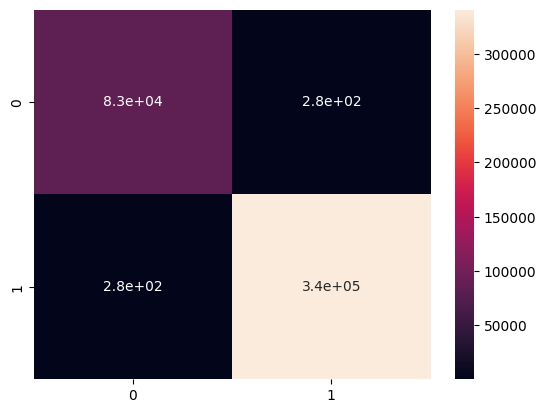

In [39]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [40]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [41]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["RF"] = results

In [42]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MAE,MSE,RMSE
KNN,0.996900,0.996908,0.996903,0.996900,0.003100,0.003100,0.055678
RF,0.998677,0.998677,0.998677,0.998677,0.001323,0.001323,0.036367


In [71]:
with open('rf_clf.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

## 5.3. XGBoost

In [35]:
%%time

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

CPU times: user 22min 50s, sys: 2.86 s, total: 22min 52s
Wall time: 2min 59s


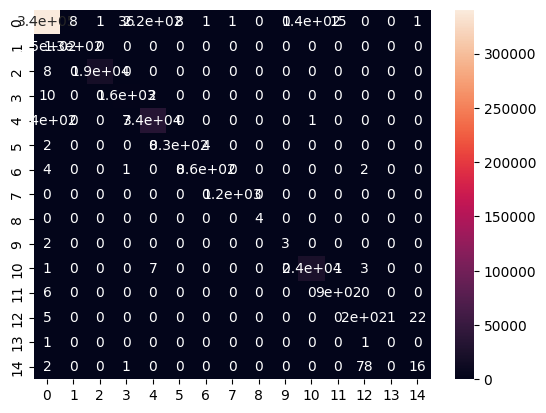

In [36]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [37]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [38]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["XGBoost"] = results

In [39]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MAE,MSE,RMSE
XGBoost,0.997904,0.997846,0.997801,0.997904,0.009126,0.060585,0.24614


In [40]:
!ls ../../models/CIC_IDS_2017

README	xgb_clf.pkl


In [41]:
with open('../../models/CIC_IDS_2017/xgb_clf_multiclass.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

## 5.4. LightGBM

In [51]:
%%time

lgbm_clf = lightgbm.LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 1930312, number of negative: 473382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2403694, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803061 -> initscore=1.405534
[LightGBM] [Info] Start training from score 1.405534


/home/kostas/Documents/Programs/Python/RT_IDS/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CPU times: user 32.6 s, sys: 55.4 ms, total: 32.7 s
Wall time: 8.36 s


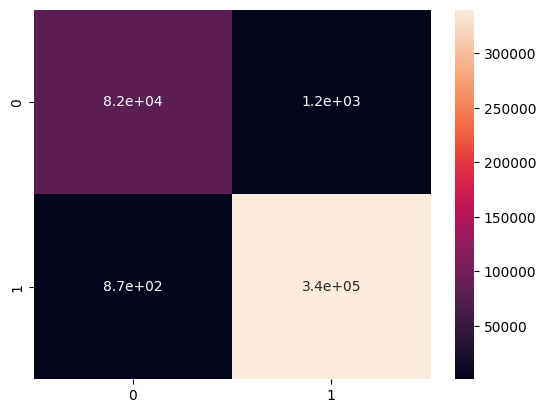

In [52]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [53]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [54]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["LightGBM"] = results

In [55]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MAE,MSE,RMSE
KNN,0.996900,0.996908,0.996903,0.996900,0.003100,0.003100,0.055678
RF,0.998677,0.998677,0.998677,0.998677,0.001323,0.001323,0.036367
XGBoost,0.996886,0.996885,0.996886,0.996886,0.003114,0.003114,0.055805
LightGBM,0.995089,0.995084,0.995086,0.995089,0.004911,0.004911,0.070076


In [70]:
with open('lgbm_clf.pkl', 'wb') as f:
    pickle.dump(lgbm_clf, f)

## 5.5. Linear Support Vector Classifier

In [56]:
%%time

svc_clf = LinearSVC()
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

CPU times: user 4.56 s, sys: 60.3 ms, total: 4.62 s
Wall time: 4.66 s


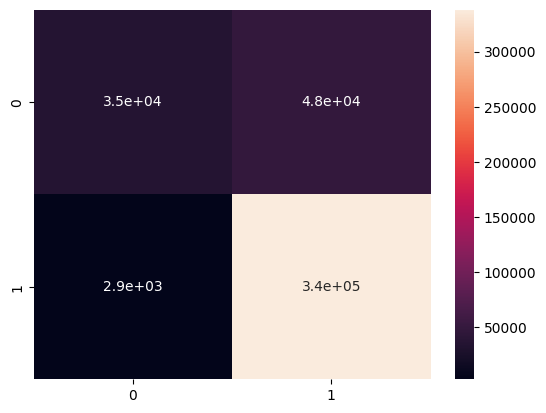

In [57]:
visualize_CM(confusion_matrix(y_test, y_pred))

In [58]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

In [59]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["LSVC"] = results

In [60]:
pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"]).T

,KNN,RF,XGBoost,LightGBM,LSVC
Accuracy,0.996900,0.998677,0.996886,0.995089,0.879521
Precision,0.996908,0.998677,0.996885,0.995084,0.884579
F1,0.996903,0.998677,0.996886,0.995086,0.860765
Recall,0.996900,0.998677,0.996886,0.995089,0.879521
MAE,0.003100,0.001323,0.003114,0.004911,0.120479
MSE,0.003100,0.001323,0.003114,0.004911,0.120479
RMSE,0.055678,0.036367,0.055805,0.070076,0.347101


In [73]:
with open('svc_clf.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

## 5.6. Neural Network

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1971029, 10, 1),
 (1971029,),
 (432665, 10, 1),
 (432665,),
 (424182, 10, 1),
 (424182,))

In [62]:
def create_model(X_train, y_train):
    model = keras.Sequential()
    model.add(keras.layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model(X_train, y_train)

/home/kostas/Documents/Programs/Python/RT_IDS/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1759995452.684515   28596 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759995452.796997   28596 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,232 (270.44 KB)

 Trainable params: 69,232 (270.44 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
%%time
model.fit(X_train, y_train,
          batch_size=32,
          epochs=20,
          validation_data=(X_val, y_val))
gc.collect();

Epoch 1/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.9681 - loss: 0.0739 - val_accuracy: 0.9762 - val_loss: 0.0579
Epoch 2/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.9747 - loss: 0.0574 - val_accuracy: 0.9754 - val_loss: 0.0568
Epoch 3/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - accuracy: 0.9763 - loss: 0.0542 - val_accuracy: 0.9805 - val_loss: 0.0502
Epoch 4/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.9774 - loss: 0.0517 - val_accuracy: 0.9785 - val_loss: 0.0492
Epoch 5/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - accuracy: 0.9785 - loss: 0.0492 - val_accuracy: 0.9778 - val_loss: 0.0522
Epoch 6/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - accuracy: 0.9804 - loss: 0.0461 - val_accuracy: 0.9807 - val_loss: 0.0425
Epoch 7/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - accuracy: 0.9824 - loss: 0.0434 - val_accuracy: 0.9830 - val_loss: 0.0416
Epoch 8/20
61595/61595 ━━━━━━━━━━━━━━━━━━━━ 119s 2ms/step - ac

In [65]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

13256/13256 ━━━━━━━━━━━━━━━━━━━━ 9s 704us/step


In [66]:
_, accuracy = model.evaluate(X_test, y_test)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

13256/13256 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9823 - loss: 0.0448


In [77]:
model.save('ANN.keras')

In [67]:
results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["RNN"] = results

In [68]:
results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

# 6. Plotting data

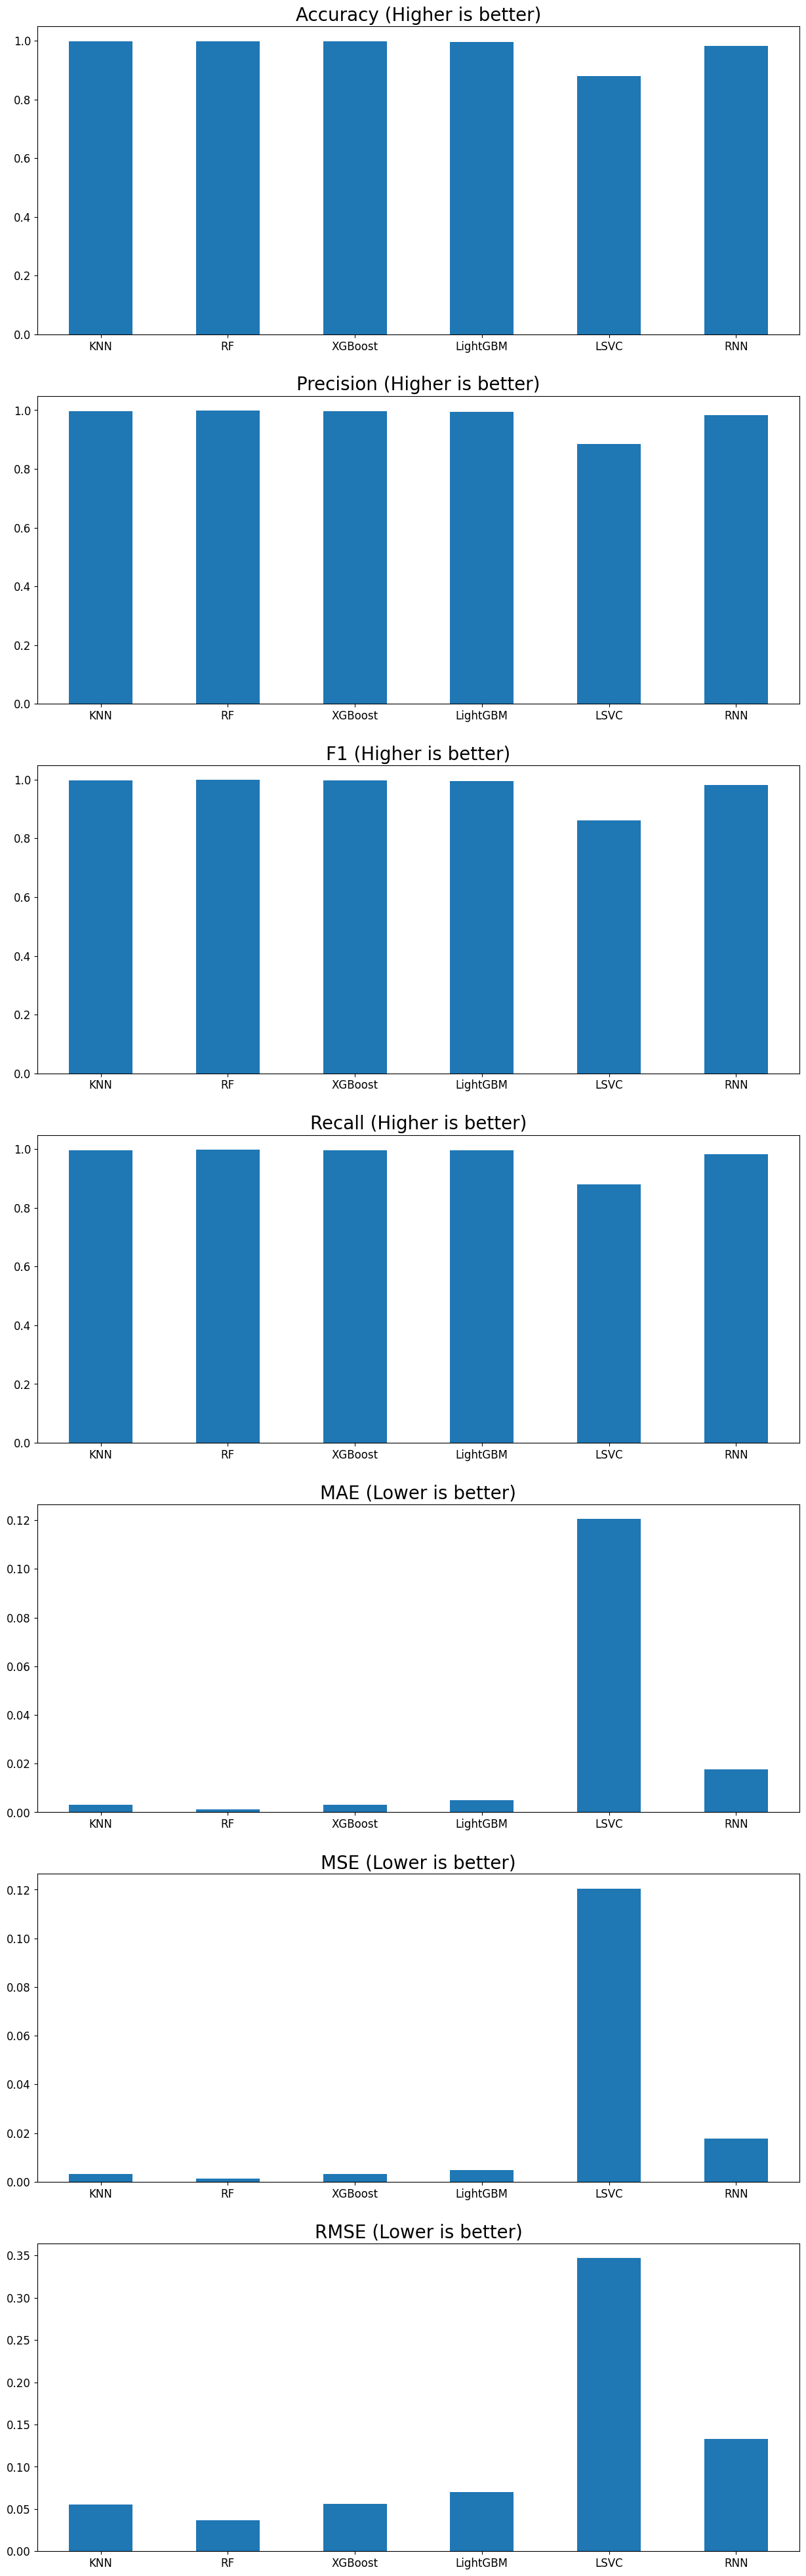

In [69]:
plotResults(results_df, results_df.columns, len(results_df.columns), 1)